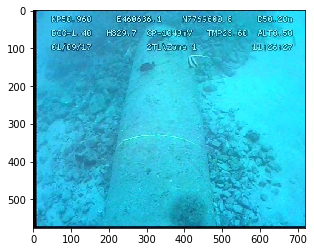

In [1]:
#filename='img18007.jpg'
filename='test.jpg'
import mxnet as mx
from mxnet import image
from gluoncv.data.transforms.presets.segmentation import test_transform
import gluoncv
from matplotlib import pyplot as plt
import cv2
import numpy as np

img = image.imread(filename)
plt.imshow(img.asnumpy())
plt.show()

In [2]:
# use cpu
ctx = mx.cpu(0)

## load test image
img = image.imread(filename)
img = test_transform(img, ctx)
img = img.astype('float32')


# reconstruct the PSP network model
model = gluoncv.model_zoo.DeepLabV3(nclass=2, backbone='resnet101')

# load the trained model

model.load_parameters('model/model_algo-1', ctx=ctx , ignore_extra=True)
#print(model.summary)

# make inference

output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

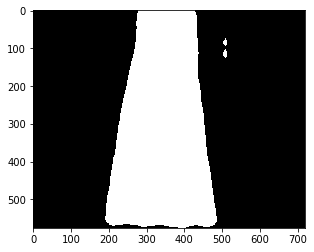

In [3]:
plt.imshow(predict, cmap='gray')
plt.show()

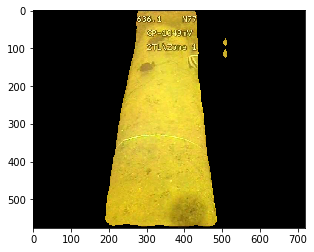

In [8]:
from PIL import Image
img1 = cv2.imread(filename)
#image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

#from gluoncv.utils.viz import get_color_pallete
#import matplotlib.image as mpimg
#mask = get_color_pallete(predict, 'ade20k')
#mask.save('output.png')

#predict = predict.astype(np.uint8)

img2 = cv2.imread('output.png')
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

predict = predict.astype(np.uint8)
ret, mask = cv2.threshold(predict, .5, 255, cv2.THRESH_BINARY)

white_background = np.full(img1.shape, 255, dtype=np.uint8)
bk = cv2.bitwise_or(white_background, white_background, mask=mask)

final = cv2.bitwise_and(img1, bk)

plt.imshow(final, cmap='gray')


#masked_image = cv2.bitwise_or(image1, mask)
#masked_image = cv2.bitwise_and(image1, mmask)
#plt.imshow(masked_image, cmap='gray')

#cv2.imshow("g", final)
#cv2.waitKey(0)
#cv2.destroyAllWindows()